In [76]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.integrate import odeint, solve_ivp
from scipy.linalg import eigvals
import time

#use scipy in part 2 as needed

#===== Codes for Part 1=====#
def searchGPT(graph, source, target):
    # Initialize distances with infinity for all nodes except the source
    distances = {node: float('inf') for node in graph}
    #Distance of the source from itself is 0
    distances[source] = 0

    # Initialize a priority queue to keep track of nodes to explore
    priority_queue = [(0, source)]  # (distance, node)

    # Initialize a dictionary to store the parent node of each node in the shortest path
    parents = {}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue) #Pops and returns the smallest element from the heap
        # If the current node is the target, reconstruct the path and return it - only used in final step
        if current_node == target:
            path = []
            while current_node in parents:
                path.insert(0, current_node)
                current_node = parents[current_node]
            path.insert(0, source)
            return current_distance,path

        # If the current distance is greater than the known distance, skip this node
        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = max(distances[current_node], weight['weight'])
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                parents[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))
    

    return float('inf')  # No path exist



def searchPKR(G,s,x):
    """Input:
    G: weighted NetworkX graph with n nodes (numbered as 0,1,...,n-1)
    s: an integer corresponding to a node in G - source node
    x: an integer corresponding to a node in G - target node
    """
    #Finalised dictionary of nodes and distances
    Fdict = {}
    #Dictionary of nodes and [distance, node]
    Mdict = {}
    #Heap of nodes and distances
    Mlist = []
    dmin = float('inf')
    #Number of nodes in G
    n = len(G)
    G.add_node(n)
    heapq.heappush(Mlist,[0,s]) #Pushes [0,s] (distance, node) onto Mlist (heap)8
    Mdict[s]=Mlist[0] #Dict stores node as key and [distance, node] as value
    found = False

    while len(Mlist)>0:
        #Distance, node
        dmin,nmin = heapq.heappop(Mlist)
        #Check if node is target node
        if nmin == x:
            found = True
            break
        
        #define the distance of the node nmin to be dmin which is the distance from the source
        Fdict[nmin] = dmin

        #m=node nmin, en=neighbour of nmin, wn=weight of edge between nmin and en
        for m,en,wn in G.edges(nmin,data='weight'):
            if en in Fdict:
                #If we already have a finalised distance for the node we dont need to do anything
                pass
            elif en in Mdict:
                #updated distance is max distance 
                dcomp = max(dmin,wn)
                #if the updated distance is less than the current distance in the dictionary
                if dcomp<Mdict[en][0]:
                    l = Mdict.pop(en)
                    l[1] = n
                    lnew = [dcomp,en]
                    heapq.heappush(Mlist,lnew)
                    Mdict[en]=lnew
            else:
                dcomp = max(dmin,wn)
                #lnew is [distance, node]
                lnew = [dcomp,en]
                heapq.heappush(Mlist, lnew)
                Mdict[en] = lnew
    return dmin

In [77]:
def searchPKR2(G,s,x):
    """Input:
    G: weighted NetworkX graph with n nodes (numbered as 0,1,...,n-1)
    s: an integer corresponding to a node in G
    x: an integer corresponding to a node in G
    Output: Should produce equivalent output to searchGPT given same input
    """
    # Finalised dictionary of nodes and distances
    Fdict = {}
    # Dictionary of nodes and [distance, node]
    Mdict = {s: [0, s]}
    # Heap of nodes and distances
    Mlist = [Mdict[s]]
    
    while Mlist:
        # Distance, node
        dmin, nmin = heapq.heappop(Mlist)
        if nmin == x:
            Fdict[nmin] = dmin
            break

        # Define the distance of the node nmin to be dmin which is the distance from the source
        Fdict[nmin] = dmin
        # m=node nmin, en=neighbour of nmin, wn=weight of edge between nmin and en
        for m, en, wn in G.edges(nmin, data='weight'):
            if en in Fdict:
                # If we already have a finalised distance for the node we dont need to do anything
                pass
            #Compute distance
            dcomp = max(dmin, wn)
            #Groups both statements used in original PKR as code is the same for both
            if en not in Mdict or dcomp < Mdict[en][0]:
                lnew = [dcomp, en]
                heapq.heappush(Mlist, lnew)
                Mdict[en] = [dcomp, nmin]

    #Check if the path is exists          
    if x in Fdict.keys():
        path = []
        #Store the distance
        dmin = Fdict[x]
        #Compute path
        while x in Mdict:
            #Store path in correct order
            path.append(x)
            #Update x to be the parent node
            x = Mdict[x][1]
            #If we reach the source node, add it to the path and return the path
            if x == s:
                path.append(x)
                return dmin, path[::-1]
            
    #If no path exists, return infinity
    else:
        return float('inf')

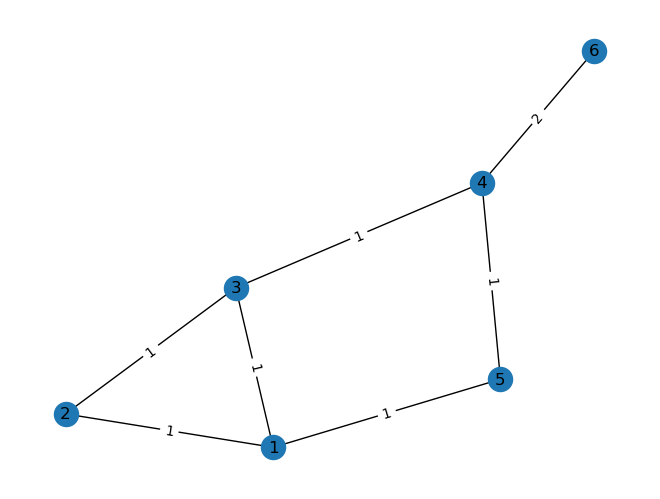

[(1, 2, 1), (1, 5, 1), (1, 3, 1)]


In [102]:
# Create an empty undirected graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from([1,2, 3, 4, 5, 6])


# Add edges to the graph (pairs of nodes)
edges = [(1, 2, 1), (2, 3, 1), (3, 4, 1), (1, 5, 1), (4, 5, 1), (1, 3, 1), (4, 6, 2)]
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True)
edge_labels = dict(((u, v), d['weight']) for u, v, d in G.edges(data=True))
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

print(G.edges(1, data='weight'))

In [103]:
print(searchGPT(G, 1, 6))
print(searchPKR2(G, 1, 6))

(2, [1, 3, 4, 6])
(2, [1, 3, 4, 6])


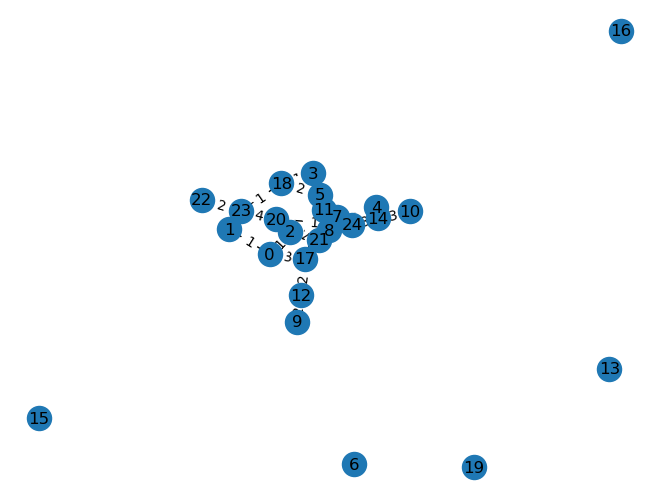

(1, [0, 2, 7, 4])
(1, [0, 2, 7, 4])


In [97]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_graph(n, m):
    # Create an empty graph
    G = nx.Graph()

    # Add n nodes to the graph
    for i in range(n):
        G.add_node(i)

    # Add m edges to the graph with random weights
    while G.number_of_edges() < m:
        # Select two different nodes randomly
        node1, node2 = random.sample([i for i in range(n)], 2)

        if G.has_edge(node1, node2):
            continue

        # Generate a random weight
        weight = random.randint(1, 5)

        # Add the edge to the graph
        G.add_edge(node1, node2, weight=weight)

    return G

def add_to_graph(G):
    # Add a new node to the graph
    G.add_node(G.number_of_nodes())

    # Add edges to the new node
    for node in range(G.number_of_nodes() - 1):
        weight = random.randint(1, 100)
        G.add_edge(node, G.number_of_nodes() - 1, weight=weight)

    return G

# Generate a graph with 5 nodes and 7 edges
G = generate_graph(25, 30)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

print(searchGPT(G, 0, 4))
print(searchPKR2(G, 0, 4))


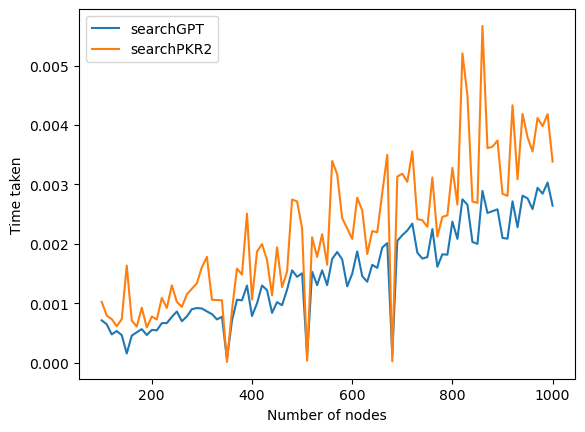

In [116]:
import time
from matplotlib import pyplot as plt
def time_func_nodes():
    time_list = []
    time_list2 = []
    for n in range(100, 1001, 10):
        G = generate_graph(n, 2 * n)
        start = time.time()
        searchGPT(G, 0, n - 1)
        end = time.time()
        start_2 = time.time()
        searchPKR2(G, 0, n - 1)
        end_2 = time.time()
        time_list2.append(end_2 - start_2)
        time_list.append(end - start)
    
    plt.plot(range(100, 1001, 10), time_list, label='searchGPT')
    plt.plot(range(100, 1001, 10), time_list2, label='searchPKR2')
    plt.xlabel('Number of nodes')
    plt.ylabel('Time taken')
    plt.legend()
    plt.savefig('time_func_nodes.png')
    plt.show()
time_func_nodes()

In [51]:
def part2q1(y0,tf=1,Nt=5000):
    """
    Part 2, question 1
    Simulate system of n nonlinear ODEs

    Input:
    y0: Initial condition, size n array
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    seed: ensures same intial condition is generated with each simulation
    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x n array containing y at
            each time step including the initial condition.
    """
    import numpy as np
    
    #Set up parameters, arrays
    n = y0.size
    tarray = np.linspace(0,tf,Nt+1)
    yarray = np.zeros((Nt+1,n))
    yarray[0,:] = y0
    beta = 0.04/np.pi**2
    alpha = 1-2*beta
    
    def RHS(t,y):
        """
        Compute RHS of model
        """        
        dydt = np.zeros_like(y)
        for i in range(1,n-1):
            dydt[i] = alpha*y[i]-y[i]**3 + beta*(y[i+1]+y[i-1])
        
        dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[-1])
        dydt[-1] = alpha*y[-1]-y[-1]**3 + beta*(y[0]+y[-2])
        
        return dydt 


    # Compute numerical solutions
    dt = tarray[1]
    for i in range(Nt):
        yarray[i+1,:] = yarray[i,:]+dt*RHS(0,yarray[i,:])
    print(np.linalg.norm(RHS(0,yarray[-1,:])))
    return tarray,yarray


data = np.load('project2.npy') # modify/discard as needed
y0 = data[0,:]



def part2q1new(y0, tf=1, Nt=5000):
    """
    Part 2, question 1
    Simulate system of n nonlinear ODEs

    Input:
    y0: Initial condition, size n array
    tf, Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    seed: ensures the same initial condition is generated with each simulation
    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x n array containing y at each time step including the initial condition.
    """
    beta =  10000 / np.pi**2
    alpha = 1 - 2 * beta
    
    tarray = np.linspace(0, tf, Nt + 1)
    def RHSnew(y, t):
        """
        Compute RHS of model
        """
        dydt = np.empty_like(y)
        dydt[1:-1] = alpha * y[1:-1] - y[1:-1]**3 + beta * (y[2:] + y[:-2])
        dydt[0] = alpha * y[0] - y[0]**3 + beta * (y[1] + y[-1])
        dydt[-1] = alpha * y[-1] - y[-1]**3 + beta * (y[0] + y[-2])

        return dydt


    # Use odeint to solve the system of ODEs
    solution = odeint(RHSnew, y0, tarray)
    print(np.linalg.norm(RHSnew(solution[-1,:], 0)))
    return tarray, solution


t11 = time.time()
solution = part2q1(data[1,:], tf=40,Nt=5000)[1]
t12 = time.time()
print(t12- t11)

t21 = time.time()
solution = part2q1new(data[1,:], tf=40,Nt=5000)[1]
t22 = time.time()

print(t22- t21)



2.1743825169322347e-13
3.7139599323272705
7.036545272003114e-09
0.7958691120147705


0.0001444653625606608


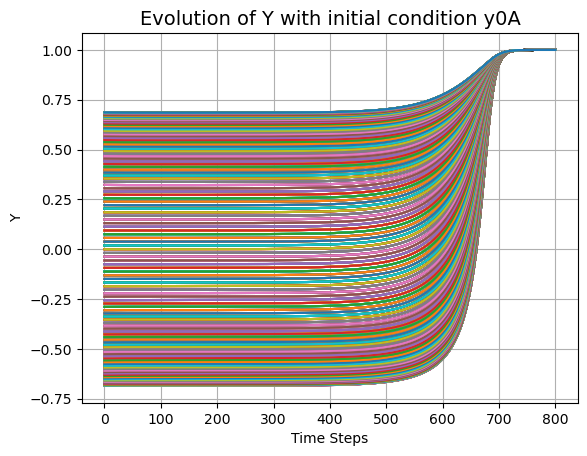

In [65]:


def part2q2(y0B, i, y0A = False): #add input variables if needed
    """
    Add code used for part 2 question 2.
    Code to load initial conditions is included below
    """
    times, vals = part2q1new(y0B, tf=40,Nt=800)

    plt.plot(vals.T[i])
    if y0A:
        for row in vals.T:
            plt.plot(row)
        plt.xlabel('Time Steps', fontsize=10)
        plt.ylabel('Y', fontsize=10)
        plt.title(f"Evolution of Y with initial condition y0A",fontsize=14)
        plt.grid()
        # Show the plot
        plt.savefig(f"part2q2.png")
        plt.show()
        return
            
    
        

    # Add labels and a legend if needed
    plt.xticks(fontsize=10)  # Adjust the font size for x-axis tick labels
    plt.yticks(fontsize=10)  # Adjust the font size for y-axis tick labels
    plt.xlabel('Time Steps', fontsize=10)
    plt.ylabel(f'Y{i}', fontsize=10)
    plt.title(f"Evolution of Y{i} with initial condition y0B",fontsize=14)
    plt.grid()
    # plt.legend(['Array 1', 'Array 2', 'Array 3'])

    # Show the plot
    plt.savefig(f"part2q2{i}.png")
    plt.show()
    #Add code here

# part2q2()

def RHSnew2(y, alpha, beta):
    """
    Compute RHS of model
    """
    dydt = np.empty_like(y)
    n = len(y)
    
    dydt[1:-1] = alpha * y[1:-1] - y[1:-1]**3 + beta * (y[2:] + y[:-2])
    dydt[0] = alpha * y[0] - y[0]**3 + beta * (y[1] + y[-1])
    dydt[-1] = alpha * y[-1] - y[-1]**3 + beta * (y[0] + y[-2])

    return dydt
beta = 10000 / (np.pi**2)


#y0A = data[0,:] #first initial condition
#y0B = data[1,:] #second initial condition
#i_list = [0, 220]
#for i in i_list:
    #part2q2(y0B, i)

#part2q2(y0A, 0, True)




In [106]:

def part2q3(tf=10,Nt=1000,mu=0.2,seed=1):
    """
    Input:
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf
    mu: model parameter
    seed: ensures same random numbers are generated with each simulation

    Output:
    tarray: size Nt+1 array
    X size n x Nt+1 array containing solution
    """

    #Set initial condition
    y0 = np.array([0.3,0.4,0.5])
    #np.random.seed(seed)
    n = y0.size #must be n=3
    Y = np.zeros((Nt+1,n)) #may require substantial memory if Nt, m, and n are all very large
    Y[0,:] = y0

    Dt = tf/Nt
    tarray = np.linspace(0,tf,Nt+1)
    beta = 0.04/np.pi**2
    alpha = 1-2*beta

    def RHS(t,y):
        """
        Compute RHS of model
        """
        dydt = np.array([0,0,0])
        dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[2])
        dydt[1] = alpha*y[1]-y[1]**3 + beta*(y[0]+y[2])
        dydt[2] = alpha*y[2]-y[2]**3 + beta*(y[0]+y[1])

        return dydt 

    dW= np.sqrt(Dt)*np.random.normal(size=(Nt,n))

    #Iterate over Nt time steps
    for j in range(Nt):
        y = Y[j,:]
        F = RHS(0,y)
        Y[j+1,0] = y[0]+Dt*F[0]+mu*dW[j,0]
        Y[j+1,1] = y[1]+Dt*F[1]+mu*dW[j,1]
        Y[j+1,2] = y[2]+Dt*F[2]+mu*dW[j,2]

    return tarray,Y


def part2q3Analyze(mu_vals, sims): #add input variables as needed
    """
    Code for part 2, question 3
    """
  
    #add code for generating figures and any other relevant calculations here
   
    
    vals = np.zeros((1001,3,sims))
    for i in mu_vals:
        for j in range(sims):
            times, vals[:,:,j] = part2q3(tf=10,Nt=1000, mu=i)
        Xave = vals.var(axis=2)
        for row in Xave.T:
            plt.plot(times, row)
        
        plt.xlabel('Time Steps', fontsize=10)
        plt.ylabel('Variance of Y', fontsize=10)
        plt.title(f"Evolution of the variance of Y from varying initial condition",fontsize=14)
        plt.legend(['Y0', 'Y1', 'Y2'])
        plt.savefig("part2q3_1var.png")
        plt.show()



0.7532107830047607


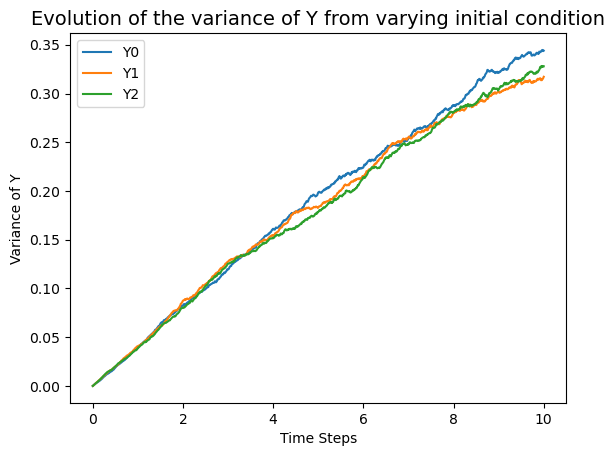

In [108]:
part2q3Analyze([0.2], 1000)

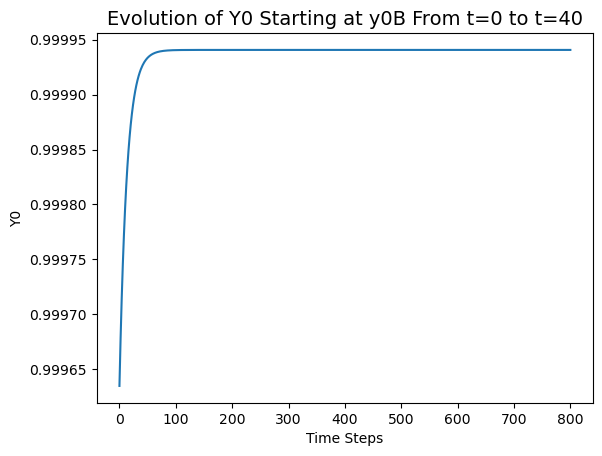

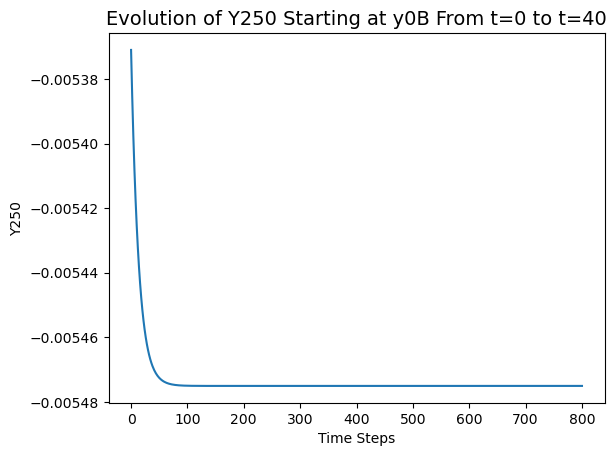

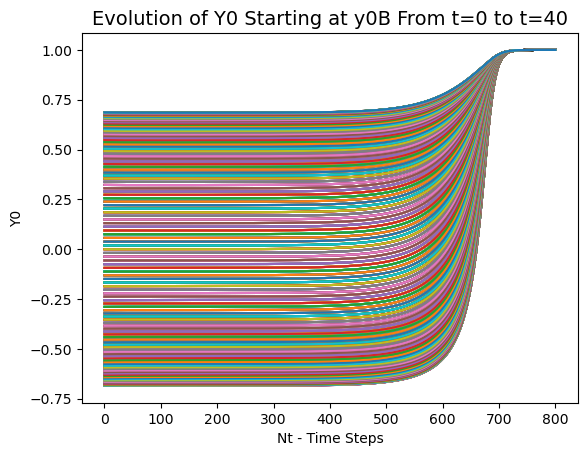